In [28]:
import pandas as pd
import nltk
import random
%matplotlib inline


In [29]:
# dataset by Barry Becker from the 1994 Census database. 
# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education-num: continuous.
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous.
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
# In this project we want to see what features influence the income 
# We have a dataset with some features such as race, age, gender ... 
# We are going see if discriminations exists and if its exists what are the most important

# Part 1 : Load and Clean data

In [77]:
# dataset headers
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
# read the dataframe
df = pd.read_csv("adult.data", sep=',', names = columns, error_bad_lines=False)
print(df.shape)
df
df['workclass'].unique()

(32561, 15)


array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)

In [78]:
# cleaning some features
del df['fnlwgt']
del df['education-num']
del df['capital-gain']
del df['capital-loss']
del df['hours-per-week']

In [79]:
# clean data do we drop the ' ?' --> it means unemployed 
"""
drop_index = []
for header in df:
    for index,row in df.iterrows():
        if row['occupation'] == ' ?':
            drop_index.append(index)
"""
#replace ? in occupation and workclass by unemployed
# http://queirozf.com/entries/pandas-dataframe-by-example

df['occupation'].replace(' ?', 'Unemployed', inplace=True) 
df['workclass'].replace(' ?', 'Unemployed', inplace=True)




In [80]:
# we want to keep only people from the US to our study
df = df[df['native-country'] == ' United-States']
df.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,United-States,>50K
12,23,Private,Bachelors,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50K


# Part 2: Exploratory Data Vizualization

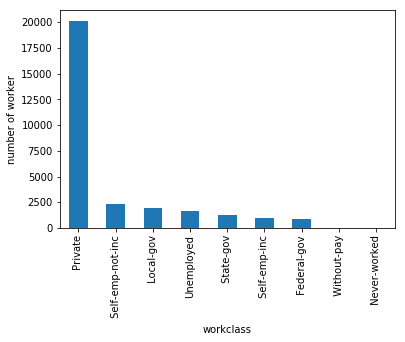

In [81]:
# bar chart showing the number of worker in each field
df2 = df['workclass'].value_counts()
ax = df2.plot(kind='bar')
ax.set_xlabel("workclass")
ax.set_ylabel("number of worker")

f1 = plt.gcf()

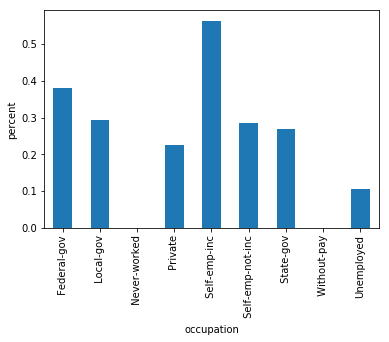

In [90]:
# bar chart showing the sector where people have an income greater than 50k in percentage
df_income = df[df['income'] == ' >50K']
df_income = df_income['workclass'].value_counts() / df['workclass'].value_counts()

ax = df_income.plot(kind='bar')
ax.set_xlabel("occupation")
ax.set_ylabel("percent")


f2 = plt.gcf()

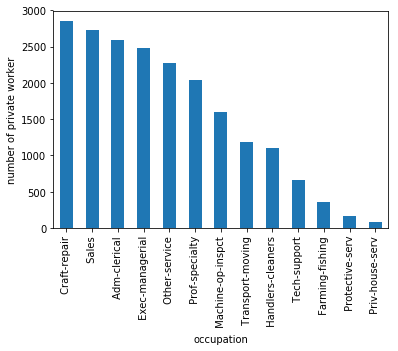

In [75]:
# bar chart showing the occupation in the private sector
df2 = df[df['workclass'] == ' Private']
df2 = df2['occupation'].value_counts()


ax = df2.plot(kind='bar')
ax.set_xlabel("occupation")
ax.set_ylabel("number of private worker")


f2 = plt.gcf()

In [ ]:
# histogram chart showing the race in the private sector

In [ ]:
# histogram chart showing the gender in the private sector

# Part 3: Exploring The Data

# Part 4: Data Analysis

# Part 5: Income Prediction

In [1]:
# Here we are going to apply machine learning to see what are the most important
# features to determine that people are above or below 50k per year

In [45]:
# store income greater than > 50k and < 50k
income_negative = []
income_positive = []

# separate the income into > and < than 50k
income_negative = df.loc[df['income'] == ' <=50K']
income_positive = df.loc[df['income'] == ' >50K']



income_negative['income'].replace(' <=50K', 'negative',inplace=True)
income_positive['income'].replace(' >50K', 'positive',inplace=True)

income_50_plus = income_positive['income']
income_50_minus = income_negative['income']

del income_negative['income']
del income_positive['income']

row_negative=[]
for row in income_negative.iterrows():
    index, data = row
    row_negative.append(data)

row_positive=[]
for row in income_positive.iterrows():
    index, data = row
    # data.tolist()
    row_positive.append(data)


# only keep rows and their label as a list
df_negative = list(zip(row_negative, income_50_minus))
df_positive = list(zip(row_positive, income_50_plus))

print(df_negative)

/home/nicolas/.local/lib/python3.5/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [46]:
# merge the two list
df = df_negative + df_positive
# shuffle the dataframe
random.shuffle(df)

In [58]:
df_pred = []
for (words, income) in df:
    words_filtered = []
    #print(income)
    # add some rules to better tokenize
    for e in words:
        words_filtered.append(e)
    df_pred.append((words_filtered, income))
        
print(len(df_pred))
    
# shuffle the tweets dataset
random.shuffle(df_pred)

29170


In [59]:
# training and test set
# we keep 90% for the training set and 10% for the test set
limit_set = int(len(df_pred)/10)
test_set = df_pred[:limit_set]
training_set = df_pred[limit_set:]

In [60]:
print(test_set[:2])

[([23, ' Private', ' 11th', ' Separated', ' Other-service', ' Unmarried', ' White', ' Female', ' United-States'], 'negative'), ([40, ' Private', ' HS-grad', ' Married-civ-spouse', ' Transport-moving', ' Husband', ' White', ' Male', ' United-States'], 'negative')]


In [61]:
# Classifier

# the list of words features need to be extracted from the tweets. 
# it is a list with every distinct words ordered by frequency of appearance

def get_words_in_rows(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

def get_word_feature(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.most_common()
    # split the list of tuples to keep the words
    word_features, freq = map(list,zip(*word_features))
    return word_features

word_features = get_word_feature(get_words_in_rows(df_pred))
print(word_features[:20])

[' United-States', ' White', ' Private', ' Male', ' Married-civ-spouse', ' Husband', ' HS-grad', ' Female', ' Never-married', ' Not-in-family', ' Some-college', ' Bachelors', ' Own-child', ' Divorced', ' Exec-managerial', ' Prof-specialty', ' Craft-repair', ' Adm-clerical', ' Sales', 'Unemployed']


In [62]:
# feature extractor
# dictionnary indicating what words are contained in the input passed
def extract_features(document):
    document_words = set(document)
    features = {}
    count = 0
    for word in word_features:
        # cerate our dictionnary of 3000 words
        if count == 132:
            break
        
        features['contain(%s)' %word] = (word in document_words)
        count = count + 1
    return features

In [63]:
len(word_features)

133

In [64]:
# apply feature to our classifier 
training_set = nltk.classify.apply_features(extract_features, training_set)
test_set = nltk.classify.apply_features(extract_features, test_set)
print('done')

done


In [65]:
# train our classifier
classifier = nltk.NaiveBayesClassifier.train(training_set)
print('done')

done


In [66]:
print(nltk.classify.accuracy(classifier, test_set))

0.7470003428179637


# Part 6: Discussion and Conclusion

In [2]:
classifier.show_most_informative_features(40)

NameError: name 'classifier' is not defined